# Prıprava dat
## Zadanie: 
Načtěte dataset a ujistěte se, že rozumíte hodnotám ve sloupcích. Můžete změnit názvy sloupců a odstranit z nich mezery, což se vám může později hodit.

## My solution
1. using pandas function read_csv to load data
2. preparing dataset by removing spaces in column names, renaming colums to use the same convention
    -  calling attribute of the DataFrame *.columns*, that holds the column names
    -  using StringMethods *str* that allows me applying string operations on the  array of column names
        - using method *.rename()* to change column names  to new column_mapping (dictionary)
        - using method *.strip()* to remove any spaces from each column name
        - using method *.replace(' ', '_')* to replace each space with an underscore 
3. checking dataset 
    - calling method .head() to display the first 5 rows
    - calling attribute .columns to display its column names


In [30]:
import pandas as pd # type: ignore

data = pd.read_csv("data/adm_data.csv")

# Remove spaces from column names
data.columns = data.columns.str.strip().str.replace(' ', '_')

# Rename columns (same convention)
column_mapping = {
    'Serial_No.': 'Serial_Number',
    'GRE_Score': 'GRE_Score',
    'TOEFL_Score': 'TOEFL_Score',
    'University_Rating': 'University_Rating',
    'SOP': 'SOP',
    'LOR_': 'LOR',
    'CGPA': 'CGPA',
    'Research': 'Research',
    'Chance_of_Admit_': 'Chance_of_Admit'
}
data.rename(columns=column_mapping, inplace=True)

# Check the new column names and first few rows of data
data.head(), data.columns



(   Serial_Number  GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  \
 0              1        337          118                  4  4.5  4.5  9.65   
 1              2        324          107                  4  4.0  4.5  8.87   
 2              3        316          104                  3  3.0  3.5  8.00   
 3              4        322          110                  3  3.5  2.5  8.67   
 4              5        314          103                  2  2.0  3.0  8.21   
 
    Research  Chance_of_Admit  
 0         1             0.92  
 1         1             0.76  
 2         1             0.72  
 3         1             0.80  
 4         0             0.65  ,
 Index(['Serial_Number', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
        'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
       dtype='object'))

# Normalita dat pro TOEFL skóre
## Zadanie: 

1. Vypočítejte průměr a medián pro TOEFL skóre.
2. Vypočítejte směrodatnou odchylku.
3. Vytvořte histogram pro TOEFL skóre a nezapomeňte zobrazit odhadovanou křivku pravděpodobnostního rozdělení.
4. Otestujte, zda je TOEFL skóre vybráno z normálního rozdělení pomocí statistického testu. Uvažujte hladinu.

## My solution
1. using methods .mean() and .median() over the column TOEFL_Score
2. using method .std() over the TOEFL_Score column to calculate standard deviation and round it to 2 decimals
3. importing the libs seaborn and matplotlib, using 
    - plt.title, plt.xlabel and plt.ylabel to setting up the description of histogram
    - sns.histplot to create histogram over the column TOEFL_score
    - using parameter kde=True to display KDE curve to the histogram
    - setting number of gistogram bins by parameter bins and setting color of bins
    - using method *plt.axvline()* for adding lines for median and mean values displayed in histogram, and attributes
        -  *color* for setting lines colors,
        - *linestyle* for setting the lines styiling
        - *label* for setting info for legend()
4. defining hyphotesis and test the normality
    - Import the *normaltest* function with alias 'nt'
    - setting up the H0 and H1 hyphotesis
    - using alpha value 5% to count stat and p-value
    - compair alpha value and counted p-value and reject or actept hypothesis

In [31]:
# Calculate Mean, Median
mean_toefl = data['TOEFL_Score'].mean()
median_toefl = data['TOEFL_Score'].median()

mean_toefl, median_toefl

(107.41, 107.0)

In [32]:
# Calculate standard deviation for TOEFL Score
toefl_std = data['TOEFL_Score'].std()

# Round the standard deviation to 2 decimal places
toefl_std_rounded = round(toefl_std, 2)
toefl_std_rounded

6.07

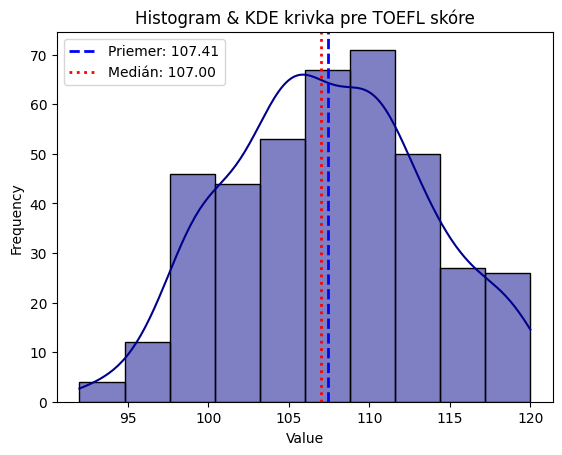

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create an example plot
sns.histplot( data['TOEFL_Score'], kde=True, bins=10, color="darkblue")

plt.title("Histogram & KDE krivka pre TOEFL skóre")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Adding mean and median to the plot
plt.axvline(mean_toefl, color='blue', linestyle='dashed', linewidth=2, label=f"Priemer: {mean_toefl:.2f}")
plt.axvline(median_toefl, color='red', linestyle='dotted', linewidth=2, label=f"Medián: {median_toefl:.2f}")

plt.legend()
plt.show()

In [34]:
from scipy.stats import normaltest as nt  

# Formulation of hypotheses:
# H0: Data follow a normal distribution
# H1: Data do not follow a normal distribution

alpha = 0.05

# Testing for normality using the DAgostino-Pearson test
stat, p_value = nt(data['TOEFL_Score'])

if p_value > alpha:
   print("TOEFL Score follows a normal distribution (failed to reject H0)")
else:
   print("TOEFL Score does not follow a normal distribution (reject H0)")

print("D'Agostino-Pearson Test:")
print(f"  stat = {stat:.3f}")
print(f"  p-value = {p_value:.3f}")



TOEFL Score does not follow a normal distribution (reject H0)
D'Agostino-Pearson Test:
  stat = 11.070
  p-value = 0.004
